## Assignment Session 10 (Super Convergence)
In this assignment, for training CIFAR-10 dataset, Custom ResNet architecutre, Data Augmentation (Padding, RadnomCrop, Cutout, Horizontal Flip) and One Cycle LR policy are used to train teh model in 24 epochs and achieved 92.18% Test Accuracy . Developed APIs so as to load data, train, test and show results.

Following changes are done:

1. Added Data Augmentations (Albumentatons)

i. Padding (4)

ii. RandomCrop

iii. Cutout

iv. Horizontal Flip

2. Plotted the Cyclic LR over iterations

3. Performed LR Range Test for various maximum LR values for test accuracy in 5 epochs

4. Used One Cycle learning strategey for scheduling learning rates

Got best test accuracy: 92.18%


In [ ]:
%matplotlib inline
import autoreload
%load_ext autoreload
%autoreload

In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git --no-cache-dir

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-vmvv35e1
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-vmvv35e1
  Resolved https://github.com/albumentations-team/albumentations.git to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=125700 sha256=f24fbc43b7778567196a7ccf00b40d2380403e20d43d1f586d8dffaf684efd2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrnhq0wj/wheels/f9/34/b6/eb7adf92e69b5629d7de6904c0d4ac4e5050b18ce065bab4e1
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


## Mount the google drive

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clone the Github Repository

In [ ]:
!git clone https://github.com/monimoydebp/session10.git

Cloning into 'session10'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 62 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (62/62), 4.18 MiB | 2.62 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
! ls -l session10

total 3012
-rw-r--r-- 1 root root 3054036 Jul 22 14:20 Custom_Resnet_SuperConvergence.ipynb
drwxr-xr-x 2 root root    4096 Jul 22 14:20 data_loaders
drwxr-xr-x 2 root root    4096 Jul 22 14:20 data_transformations
drwxr-xr-x 2 root root    4096 Jul 22 14:20 images
drwxr-xr-x 2 root root    4096 Jul 22 14:20 models
-rw-r--r-- 1 root root    4579 Jul 22 14:20 README.md
drwxr-xr-x 2 root root    4096 Jul 22 14:20 utils


## Copy all the API python files from the google drive to local folder

Follwing python files are imported from google drive. Purpsoe of these files are as below:

model.py - Defines the model class Net
train_test.py- API for training and testing
accuracy_utils - API foro getting test accuracy and per class accuracy
data_loader.py - API for loading train and test data
data_transform.py - API for transforming and normalizing data
plot_metrics.py - API for plotting metrics

In [ ]:
!cp -rf '/content/session10/data_loaders' .
!cp -rf '/content/session10/data_transformations' .
!cp -rf '/content/session10/models' .
!cp -rf '/content/session10/utils' .

## Import all the libraries

In [ ]:
from PIL import Image
import cv2
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from data_transformations.data_transform_cifar10_custom_resnet import get_train_transform, get_test_transform
from data_loaders.cifar10_data_loader import get_train_loader, get_test_loader, get_classes
from models.CustomResNet import CustomResNet
from utils.train_test_utils import train,test
from utils.accuracy_utils import get_test_accuracy,get_accuracy_per_class
from utils.plot_metrics_utils import plot_loss_accuracy,plot_accuracy,plot_max_lr_vs_test_accuracy

from utils.misclassified_image_utils import  display_misclassfied_ciphar10_images
from utils.gradcamkz_util import GRADCAM, PLOT,PLOTGRADCAM
from utils.gradcamkz_util import process_for_grad_cam
from utils.cyclic_lr_util import triangle_lr_plot,custom_one_cycle_lr, max_lr_finder_schedule

## PLOT CYCLIC LR

In this step, cyclic LR  is plotted over iterations. In this example, minimum LR =0.01, maximum LR =0.4, Step size = 10, Number of Iterations = 100 are used

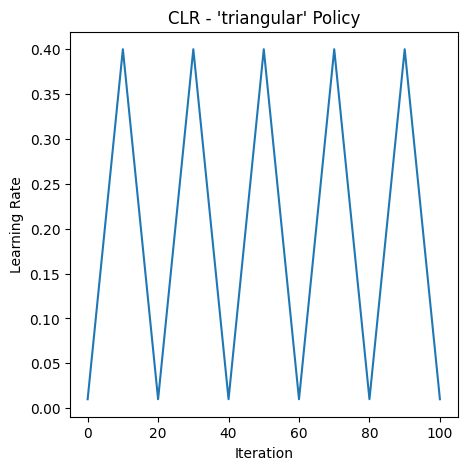

In [ ]:
triangle_lr_plot(0.01, 0.4, 10, 100)


Training a Classifier
=====================



Training an image classifier
----------------------------

I have done the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data





 ## 1. Loading and normalizing CIFAR10

 I have used APIs get_train_loader, get_test_loader to load train data and test data respectively. Both the APIs internally uses torchvision. I have used get_transform API to transform tensors in the range [-1,1]



In [ ]:
from models.main import train_test_loader,imshow, get_model,find_lr_value, train_model

In [ ]:
BATCH_SIZE=512
trainloader, testloader, classes,transform_train,transform_test = train_test_loader(BATCH_SIZE,get_train_transform, get_test_transform,get_train_loader, get_test_loader, get_classes)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:13<00:00, 12996914.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


## Visualizing some of the images in train dataset



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  car truck horse  bird


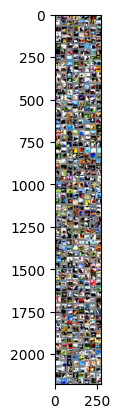

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. Define a Convolution Neural Network

I have defined the custom ResNet18 model



In [ ]:
!pip install torchsummary
from torchsummary import summary

model = get_model(CustomResNet)
print(model)
summary(model, input_size=(3, 32, 32))

CustomResNet(
  (conv): ConvBNBlock(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_out): Dropout2d(p=0.0, inplace=False)
  )
  (layer1): ResBlock(
    (transition_block): TransitionBlock(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_out): Dropout2d(p=0.0, inplace=False)
    )
    (conv_block1): ConvBNBlock(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_out): Dropout2d(p=0.0, inplace=False)
    )
    (conv_block2): ConvBNBlock(
      (conv): Conv2d(128, 1

/content/models/CustomResNet.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


## LR Range Test

In this step, a ranges of maximum Learning Rate values are searched for which gives good test accuracy in 5 epochs.

In [ ]:
from torch.optim.lr_scheduler import LambdaLR
import torch.optim as optim
import os

model = get_model(CustomResNet)
PATH_BASE_MODEL = 'base_weights_lr_range_test.pth'
torch.save(model.state_dict(), PATH_BASE_MODEL)
EPOCHS_TO_TRY = 5
max_lr_list = [0.001, 0.004, 0.008, 0.01,0.04,0.08,0.1,0.4,0.8,1,2,4]
test_accuracy_list = []
find_lr_value(model,EPOCHS_TO_TRY,max_lr_list,test_accuracy_list,PATH_BASE_MODEL,max_lr_finder_schedule,BATCH_SIZE,train,test,trainloader,testloader)

MAX LR: 0.001  EPOCH: 1


Loss=2.6489384174346924 Batch_id=97 Accuracy=9.93: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]



Test set: Average loss: 2.6941, Accuracy: 1053/10000 (10.53%)

MAX LR: 0.001  EPOCH: 2


Loss=2.6920993328094482 Batch_id=97 Accuracy=10.02: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 2.6825, Accuracy: 1048/10000 (10.48%)

MAX LR: 0.001  EPOCH: 3


Loss=2.7509188652038574 Batch_id=97 Accuracy=9.93: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]



Test set: Average loss: 2.6678, Accuracy: 1056/10000 (10.56%)

MAX LR: 0.001  EPOCH: 4


Loss=2.646385431289673 Batch_id=97 Accuracy=10.04: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 2.6599, Accuracy: 1055/10000 (10.55%)

MAX LR: 0.001  EPOCH: 5


Loss=2.591440200805664 Batch_id=97 Accuracy=10.10: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 2.6425, Accuracy: 1058/10000 (10.58%)

 For Max LR:  0.001  Test Accuracy:  10.58
MAX LR: 0.004  EPOCH: 1


Loss=2.6837737560272217 Batch_id=97 Accuracy=10.22: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 2.6362, Accuracy: 1053/10000 (10.53%)

MAX LR: 0.004  EPOCH: 2


Loss=2.551562786102295 Batch_id=97 Accuracy=10.24: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 2.5477, Accuracy: 1084/10000 (10.84%)

MAX LR: 0.004  EPOCH: 3


Loss=2.4536778926849365 Batch_id=97 Accuracy=10.71: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]



Test set: Average loss: 2.4656, Accuracy: 1142/10000 (11.42%)

MAX LR: 0.004  EPOCH: 4


Loss=2.4098474979400635 Batch_id=97 Accuracy=11.63: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 2.3940, Accuracy: 1266/10000 (12.66%)

MAX LR: 0.004  EPOCH: 5


Loss=2.3660991191864014 Batch_id=97 Accuracy=12.38: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]



Test set: Average loss: 2.3401, Accuracy: 1370/10000 (13.70%)

 For Max LR:  0.004  Test Accuracy:  13.7
MAX LR: 0.008  EPOCH: 1


Loss=2.4350147247314453 Batch_id=97 Accuracy=10.15: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 2.5141, Accuracy: 1118/10000 (11.18%)

MAX LR: 0.008  EPOCH: 2


Loss=2.4008169174194336 Batch_id=97 Accuracy=11.26: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 2.3698, Accuracy: 1316/10000 (13.16%)

MAX LR: 0.008  EPOCH: 3


Loss=2.3274435997009277 Batch_id=97 Accuracy=13.65: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 2.2856, Accuracy: 1534/10000 (15.34%)

MAX LR: 0.008  EPOCH: 4


Loss=2.262500047683716 Batch_id=97 Accuracy=16.34: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 2.2274, Accuracy: 1824/10000 (18.24%)

MAX LR: 0.008  EPOCH: 5


Loss=2.164829730987549 Batch_id=97 Accuracy=18.66: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 2.1767, Accuracy: 2084/10000 (20.84%)

 For Max LR:  0.008  Test Accuracy:  20.84
MAX LR: 0.01  EPOCH: 1


Loss=2.41762638092041 Batch_id=97 Accuracy=10.29: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]



Test set: Average loss: 2.4599, Accuracy: 1159/10000 (11.59%)

MAX LR: 0.01  EPOCH: 2


Loss=2.339456558227539 Batch_id=97 Accuracy=12.28: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 2.3136, Accuracy: 1434/10000 (14.34%)

MAX LR: 0.01  EPOCH: 3


Loss=2.244530200958252 Batch_id=97 Accuracy=15.12: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 2.2347, Accuracy: 1780/10000 (17.80%)

MAX LR: 0.01  EPOCH: 4


Loss=2.2374677658081055 Batch_id=97 Accuracy=18.59: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 2.1705, Accuracy: 2105/10000 (21.05%)

MAX LR: 0.01  EPOCH: 5


Loss=2.1472840309143066 Batch_id=97 Accuracy=20.99: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 2.1130, Accuracy: 2354/10000 (23.54%)

 For Max LR:  0.01  Test Accuracy:  23.54
MAX LR: 0.04  EPOCH: 1


Loss=2.1546144485473633 Batch_id=97 Accuracy=16.08: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]



Test set: Average loss: 2.1058, Accuracy: 2406/10000 (24.06%)

MAX LR: 0.04  EPOCH: 2


Loss=1.9248346090316772 Batch_id=97 Accuracy=25.32: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 1.9081, Accuracy: 3093/10000 (30.93%)

MAX LR: 0.04  EPOCH: 3


Loss=1.7743808031082153 Batch_id=97 Accuracy=31.37: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 1.7479, Accuracy: 3667/10000 (36.67%)

MAX LR: 0.04  EPOCH: 4


Loss=1.6933780908584595 Batch_id=97 Accuracy=35.84: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 1.6173, Accuracy: 4130/10000 (41.30%)

MAX LR: 0.04  EPOCH: 5


Loss=1.6289854049682617 Batch_id=97 Accuracy=39.67: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 1.5089, Accuracy: 4497/10000 (44.97%)

 For Max LR:  0.04  Test Accuracy:  44.97
MAX LR: 0.08  EPOCH: 1


Loss=1.8702555894851685 Batch_id=97 Accuracy=22.26: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 1.8584, Accuracy: 3278/10000 (32.78%)

MAX LR: 0.08  EPOCH: 2


Loss=1.7065656185150146 Batch_id=97 Accuracy=35.15: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 1.5704, Accuracy: 4304/10000 (43.04%)

MAX LR: 0.08  EPOCH: 3


Loss=1.5396288633346558 Batch_id=97 Accuracy=42.60: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 1.4148, Accuracy: 4820/10000 (48.20%)

MAX LR: 0.08  EPOCH: 4


Loss=1.3536475896835327 Batch_id=97 Accuracy=48.09: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 1.2824, Accuracy: 5404/10000 (54.04%)

MAX LR: 0.08  EPOCH: 5


Loss=1.3263663053512573 Batch_id=97 Accuracy=52.61: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 1.2059, Accuracy: 5704/10000 (57.04%)

 For Max LR:  0.08  Test Accuracy:  57.04
MAX LR: 0.1  EPOCH: 1


Loss=1.8256027698516846 Batch_id=97 Accuracy=24.34: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 1.7556, Accuracy: 3684/10000 (36.84%)

MAX LR: 0.1  EPOCH: 2


Loss=1.5675606727600098 Batch_id=97 Accuracy=38.51: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 1.4961, Accuracy: 4546/10000 (45.46%)

MAX LR: 0.1  EPOCH: 3


Loss=1.472823143005371 Batch_id=97 Accuracy=46.34: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 1.3488, Accuracy: 5152/10000 (51.52%)

MAX LR: 0.1  EPOCH: 4


Loss=1.3102359771728516 Batch_id=97 Accuracy=51.65: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 1.2233, Accuracy: 5602/10000 (56.02%)

MAX LR: 0.1  EPOCH: 5


Loss=1.1398234367370605 Batch_id=97 Accuracy=56.56: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 1.1370, Accuracy: 6023/10000 (60.23%)

 For Max LR:  0.1  Test Accuracy:  60.23
MAX LR: 0.4  EPOCH: 1


Loss=1.4525508880615234 Batch_id=97 Accuracy=38.68: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 1.3570, Accuracy: 5281/10000 (52.81%)

MAX LR: 0.4  EPOCH: 2


Loss=1.039080023765564 Batch_id=97 Accuracy=56.33: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]



Test set: Average loss: 1.5398, Accuracy: 5050/10000 (50.50%)

MAX LR: 0.4  EPOCH: 3


Loss=0.9643336534500122 Batch_id=97 Accuracy=64.68: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.9059, Accuracy: 6905/10000 (69.05%)

MAX LR: 0.4  EPOCH: 4


Loss=0.9231378436088562 Batch_id=97 Accuracy=70.04: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]



Test set: Average loss: 1.3452, Accuracy: 5886/10000 (58.86%)

MAX LR: 0.4  EPOCH: 5


Loss=0.6613272428512573 Batch_id=97 Accuracy=73.19: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 0.8459, Accuracy: 7322/10000 (73.22%)

 For Max LR:  0.4  Test Accuracy:  73.22
MAX LR: 0.8  EPOCH: 1


Loss=1.6970411539077759 Batch_id=97 Accuracy=36.24: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 1.7848, Accuracy: 4774/10000 (47.74%)

MAX LR: 0.8  EPOCH: 2


Loss=1.220457911491394 Batch_id=97 Accuracy=53.29: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]



Test set: Average loss: 1.7138, Accuracy: 5011/10000 (50.11%)

MAX LR: 0.8  EPOCH: 3


Loss=0.9861937761306763 Batch_id=97 Accuracy=63.56: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 3.1560, Accuracy: 4063/10000 (40.63%)

MAX LR: 0.8  EPOCH: 4


Loss=0.7630792260169983 Batch_id=97 Accuracy=68.51: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 0.8180, Accuracy: 7390/10000 (73.90%)

MAX LR: 0.8  EPOCH: 5


Loss=0.951635479927063 Batch_id=97 Accuracy=70.73: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 0.9037, Accuracy: 7192/10000 (71.92%)

 For Max LR:  0.8  Test Accuracy:  71.92
MAX LR: 1  EPOCH: 1


Loss=2.635586738586426 Batch_id=97 Accuracy=20.17: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 4.2825, Accuracy: 1855/10000 (18.55%)

MAX LR: 1  EPOCH: 2


Loss=2.4674899578094482 Batch_id=97 Accuracy=28.22: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 3.0394, Accuracy: 2646/10000 (26.46%)

MAX LR: 1  EPOCH: 3


Loss=2.228525400161743 Batch_id=97 Accuracy=35.38: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]



Test set: Average loss: 16.9688, Accuracy: 2946/10000 (29.46%)

MAX LR: 1  EPOCH: 4


Loss=1.5089160203933716 Batch_id=97 Accuracy=38.29: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 1.5351, Accuracy: 4579/10000 (45.79%)

MAX LR: 1  EPOCH: 5


Loss=1.3653448820114136 Batch_id=97 Accuracy=52.22: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 1.1696, Accuracy: 5908/10000 (59.08%)

 For Max LR:  1  Test Accuracy:  59.08
MAX LR: 2  EPOCH: 1


Loss=2.247253894805908 Batch_id=97 Accuracy=12.00: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 2.2458, Accuracy: 1703/10000 (17.03%)

MAX LR: 2  EPOCH: 2


Loss=2.073589324951172 Batch_id=97 Accuracy=20.27: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 2.0366, Accuracy: 2590/10000 (25.90%)

MAX LR: 2  EPOCH: 3


Loss=1.67914617061615 Batch_id=97 Accuracy=29.58: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 1.6488, Accuracy: 3952/10000 (39.52%)

MAX LR: 2  EPOCH: 4


Loss=1.563389778137207 Batch_id=97 Accuracy=39.47: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 1.6330, Accuracy: 4283/10000 (42.83%)

MAX LR: 2  EPOCH: 5


Loss=1.3138008117675781 Batch_id=97 Accuracy=47.69: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 1.3920, Accuracy: 5027/10000 (50.27%)

 For Max LR:  2  Test Accuracy:  50.27
MAX LR: 4  EPOCH: 1


Loss=2.1202166080474854 Batch_id=97 Accuracy=13.46: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 2.1093, Accuracy: 1838/10000 (18.38%)

MAX LR: 4  EPOCH: 2


Loss=2.202759027481079 Batch_id=97 Accuracy=17.74: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 2.1534, Accuracy: 1697/10000 (16.97%)

MAX LR: 4  EPOCH: 3


Loss=7007770.0 Batch_id=97 Accuracy=11.89: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]



Test set: Average loss: 854094135.2960, Accuracy: 1232/10000 (12.32%)

MAX LR: 4  EPOCH: 4


Loss=nan Batch_id=97 Accuracy=10.02: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

MAX LR: 4  EPOCH: 5


Loss=nan Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

 For Max LR:  4  Test Accuracy:  10.0


## Plot Maximum Learning Rate vs Test Accuracy (5 epochs)

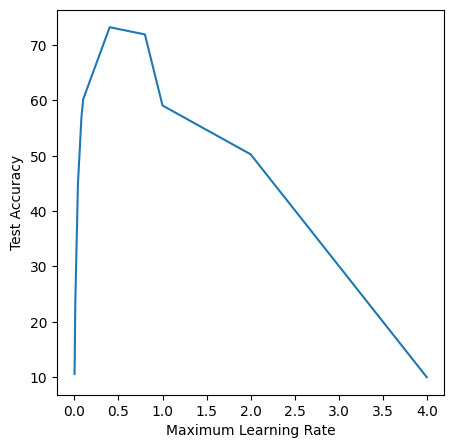

In [ ]:
plot_max_lr_vs_test_accuracy(max_lr_list,test_accuracy_list)

From the LR Range Test found that  LR value of 0.4 gives maximum Test Accuracy of 73.22 but  LR value of 0.8 gives maximum Test accuracy of 73.90 at 4th epoch.
. So decided to use maximum LR value of 0.8

## 3. Define a Loss function and optimizer and train the model

Used Classification Cross-Entropy loss and Adam optimimzer.

## 4. Train the model

 24 epochs are used to train the model. Used One Cycle LR policy for changing Learning Rates with maximum learning rate of 0.8.

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [ ]:
from torch.optim.lr_scheduler import LambdaLR
import torch.optim as optim
import os

# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
model = get_model(CustomResNet)
optimizer = optim.Adam(model.parameters(), lr=0.08)
EPOCHS = 24

one_cyle_lr = custom_one_cycle_lr(no_of_images=50176, batch_size=BATCH_SIZE, base_lr=0.08, max_lr=0.8, final_lr=0.008, epoch_stage1=5, epoch_stage2=18, total_epochs=24)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[one_cyle_lr])
PATH = '/content/drive/My Drive/cifar10_resnet18_one_cyclic_lr.pth'
torch.save(model.state_dict(), PATH)
best_test_accuracy = 0.0
train_model(best_test_accuracy,EPOCHS, model,trainloader,testloader,optimizer,train,test,train_losses,test_losses,scheduler,train_acc,test_acc,PATH)


EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/content/models/CustomResNet.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.411113977432251 Batch_id=97 Accuracy=36.43: 100%|██████████| 98/98 [00:22<00:00,  4.36it/s]



Test set: Average loss: 1.5082, Accuracy: 4695/10000 (46.95%)

Test Accuracy: 46.95 has increased. Saving the model
EPOCH: 2


Loss=1.0982192754745483 Batch_id=97 Accuracy=56.35: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



Test set: Average loss: 1.0285, Accuracy: 6373/10000 (63.73%)

Test Accuracy: 63.73 has increased. Saving the model
EPOCH: 3


Loss=0.8071767687797546 Batch_id=97 Accuracy=68.56: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 0.8826, Accuracy: 6885/10000 (68.85%)

Test Accuracy: 68.85 has increased. Saving the model
EPOCH: 4


Loss=0.9618441462516785 Batch_id=97 Accuracy=74.10: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 1.8162, Accuracy: 5851/10000 (58.51%)

EPOCH: 5


Loss=0.5504269599914551 Batch_id=97 Accuracy=77.32: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.7232, Accuracy: 7611/10000 (76.11%)

Test Accuracy: 76.11 has increased. Saving the model
EPOCH: 6


Loss=0.5123278498649597 Batch_id=97 Accuracy=80.58: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 0.6596, Accuracy: 7918/10000 (79.18%)

Test Accuracy: 79.18 has increased. Saving the model
EPOCH: 7


Loss=0.5362034440040588 Batch_id=97 Accuracy=82.98: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.5677, Accuracy: 8082/10000 (80.82%)

Test Accuracy: 80.82 has increased. Saving the model
EPOCH: 8


Loss=0.4891194701194763 Batch_id=97 Accuracy=85.20: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4667, Accuracy: 8491/10000 (84.91%)

Test Accuracy: 84.91 has increased. Saving the model
EPOCH: 9


Loss=0.30674389004707336 Batch_id=97 Accuracy=86.46: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.5405, Accuracy: 8288/10000 (82.88%)

EPOCH: 10


Loss=0.43060439825057983 Batch_id=97 Accuracy=87.89: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.5693, Accuracy: 8137/10000 (81.37%)

EPOCH: 11


Loss=0.31362032890319824 Batch_id=97 Accuracy=89.30: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 0.3956, Accuracy: 8718/10000 (87.18%)

Test Accuracy: 87.18 has increased. Saving the model
EPOCH: 12


Loss=0.2882494628429413 Batch_id=97 Accuracy=90.59: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.4391, Accuracy: 8641/10000 (86.41%)

EPOCH: 13


Loss=0.28374379873275757 Batch_id=97 Accuracy=91.56: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]



Test set: Average loss: 0.4275, Accuracy: 8643/10000 (86.43%)

EPOCH: 14


Loss=0.266021192073822 Batch_id=97 Accuracy=92.33: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]



Test set: Average loss: 0.3639, Accuracy: 8887/10000 (88.87%)

Test Accuracy: 88.87 has increased. Saving the model
EPOCH: 15


Loss=0.21150729060173035 Batch_id=97 Accuracy=93.44: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.3806, Accuracy: 8925/10000 (89.25%)

Test Accuracy: 89.25 has increased. Saving the model
EPOCH: 16


Loss=0.2029396891593933 Batch_id=97 Accuracy=94.28: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 0.3304, Accuracy: 9045/10000 (90.45%)

Test Accuracy: 90.45 has increased. Saving the model
EPOCH: 17


Loss=0.13410969078540802 Batch_id=97 Accuracy=95.11: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]



Test set: Average loss: 0.3258, Accuracy: 9055/10000 (90.55%)

Test Accuracy: 90.55 has increased. Saving the model
EPOCH: 18


Loss=0.0893770307302475 Batch_id=97 Accuracy=95.86: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]



Test set: Average loss: 0.3238, Accuracy: 9087/10000 (90.87%)

Test Accuracy: 90.87 has increased. Saving the model
EPOCH: 19


Loss=0.08241406083106995 Batch_id=97 Accuracy=96.49: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



Test set: Average loss: 0.3137, Accuracy: 9142/10000 (91.42%)

Test Accuracy: 91.42 has increased. Saving the model
EPOCH: 20


Loss=0.13268239796161652 Batch_id=97 Accuracy=96.79: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.3167, Accuracy: 9179/10000 (91.79%)

Test Accuracy: 91.79 has increased. Saving the model
EPOCH: 21


Loss=0.09354635328054428 Batch_id=97 Accuracy=96.90: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 0.3110, Accuracy: 9200/10000 (92.00%)

Test Accuracy: 92.0 has increased. Saving the model
EPOCH: 22


Loss=0.07091429829597473 Batch_id=97 Accuracy=97.20: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 0.3102, Accuracy: 9191/10000 (91.91%)

EPOCH: 23


Loss=0.060054630041122437 Batch_id=97 Accuracy=97.30: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]



Test set: Average loss: 0.3088, Accuracy: 9216/10000 (92.16%)

Test Accuracy: 92.16 has increased. Saving the model
EPOCH: 24


Loss=0.09944024682044983 Batch_id=97 Accuracy=97.50: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.3046, Accuracy: 9218/10000 (92.18%)

Test Accuracy: 92.18 has increased. Saving the model


## Load the Best Model

In [ ]:
model.load_state_dict(torch.load(PATH))
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.device = torch.device("cuda" if use_cuda else "cpu")


## 5. Test the network on the test data


In this step
- A few actual images are shown with label.
- Next print the test accuracy using API get_test_accuracy
- Next diplay class level accuracy using API get_accuracy_per_class which will give idea about which all classes prediction was good and which all classes prediction was not that good



GroundTruth:    cat  ship  ship plane


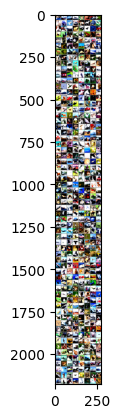

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
with torch.no_grad():
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)

/content/models/CustomResNet.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
print('Accuracy of the network on the 10000 test images: %.2f %%' % (
    get_test_accuracy(model, testloader, device)))

Accuracy of the network on the 10000 test images: 92.18 %




The accuracy 89.98 is far better than chance, which is 10% accuracy (randomly picking a class out of 10 classes).
Seems like the network learnt good.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [ ]:
class_correct,class_total = get_accuracy_per_class(model, testloader, device)

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 85 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 91 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 72 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


## Plot the performance metrics

In this step, the following metrics are plotted

i. Training Accuracy
ii. Test Accuracy

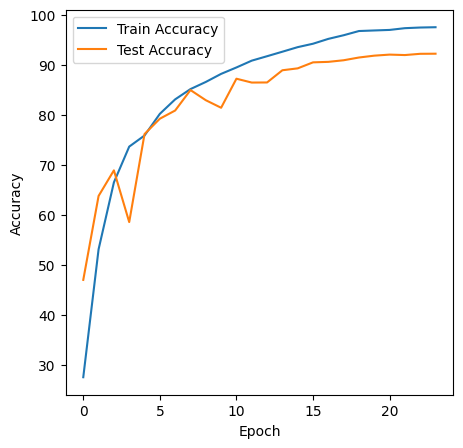

In [ ]:
plot_accuracy(train_acc, test_acc)


## Display Misclassified Images

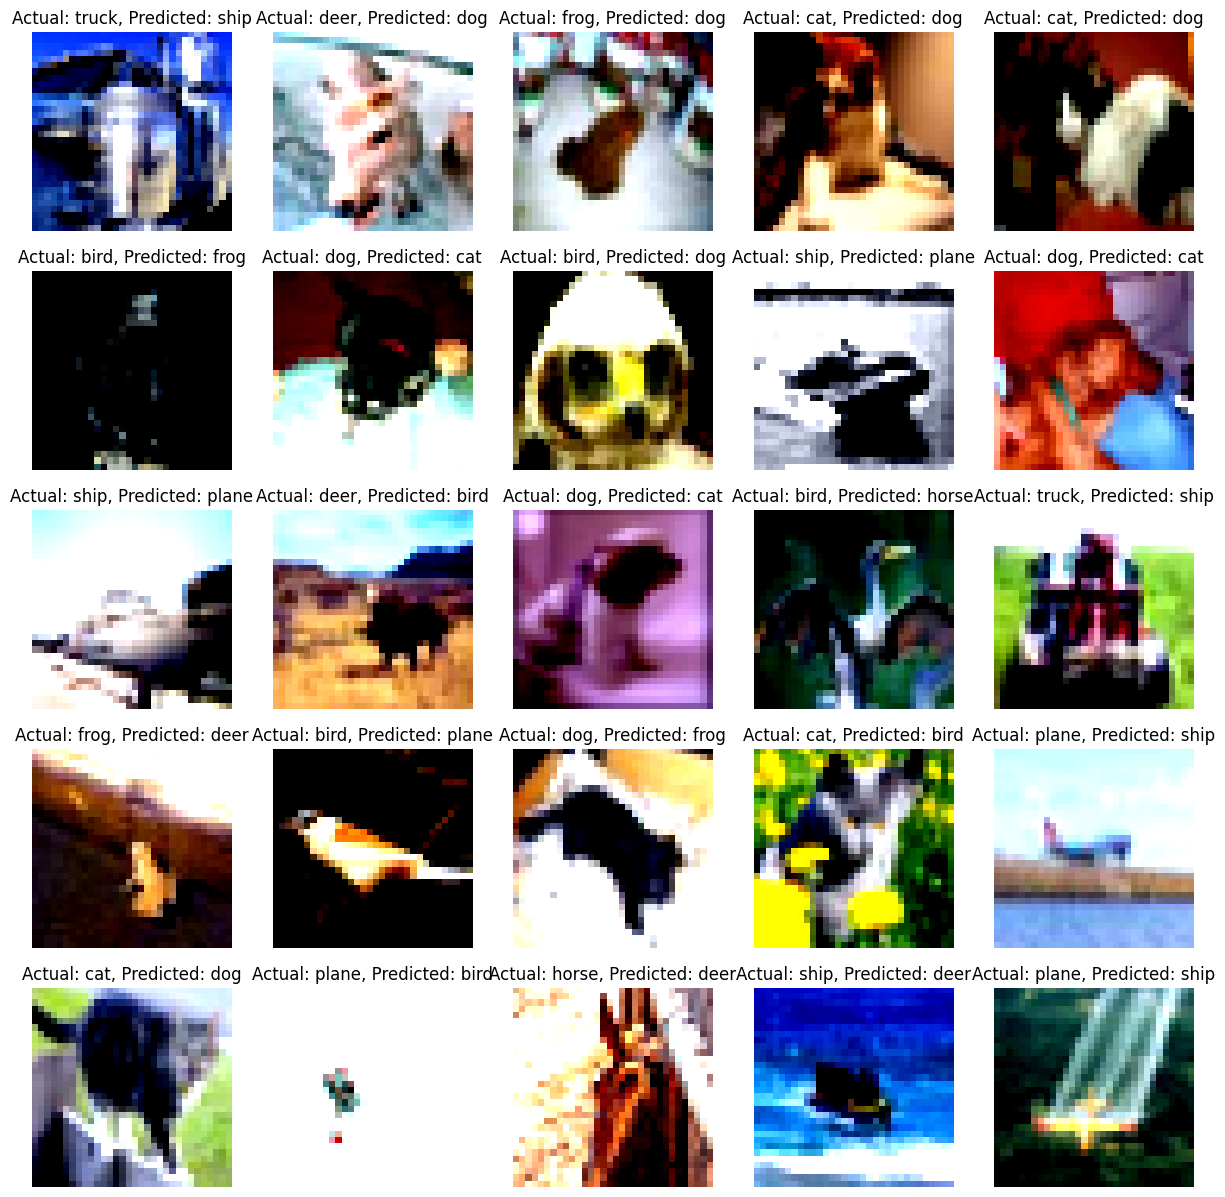

In [ ]:
incorrect_images_list,predicted_label_list,correct_label_list=display_misclassfied_ciphar10_images(testloader, model, device, classes, 25)

In [ ]:
incorrect_images=process_for_grad_cam(incorrect_images_list,predicted_label_list,correct_label_list,transform_test)

##Display GRADCAM for Misclassified Images

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([25, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
25


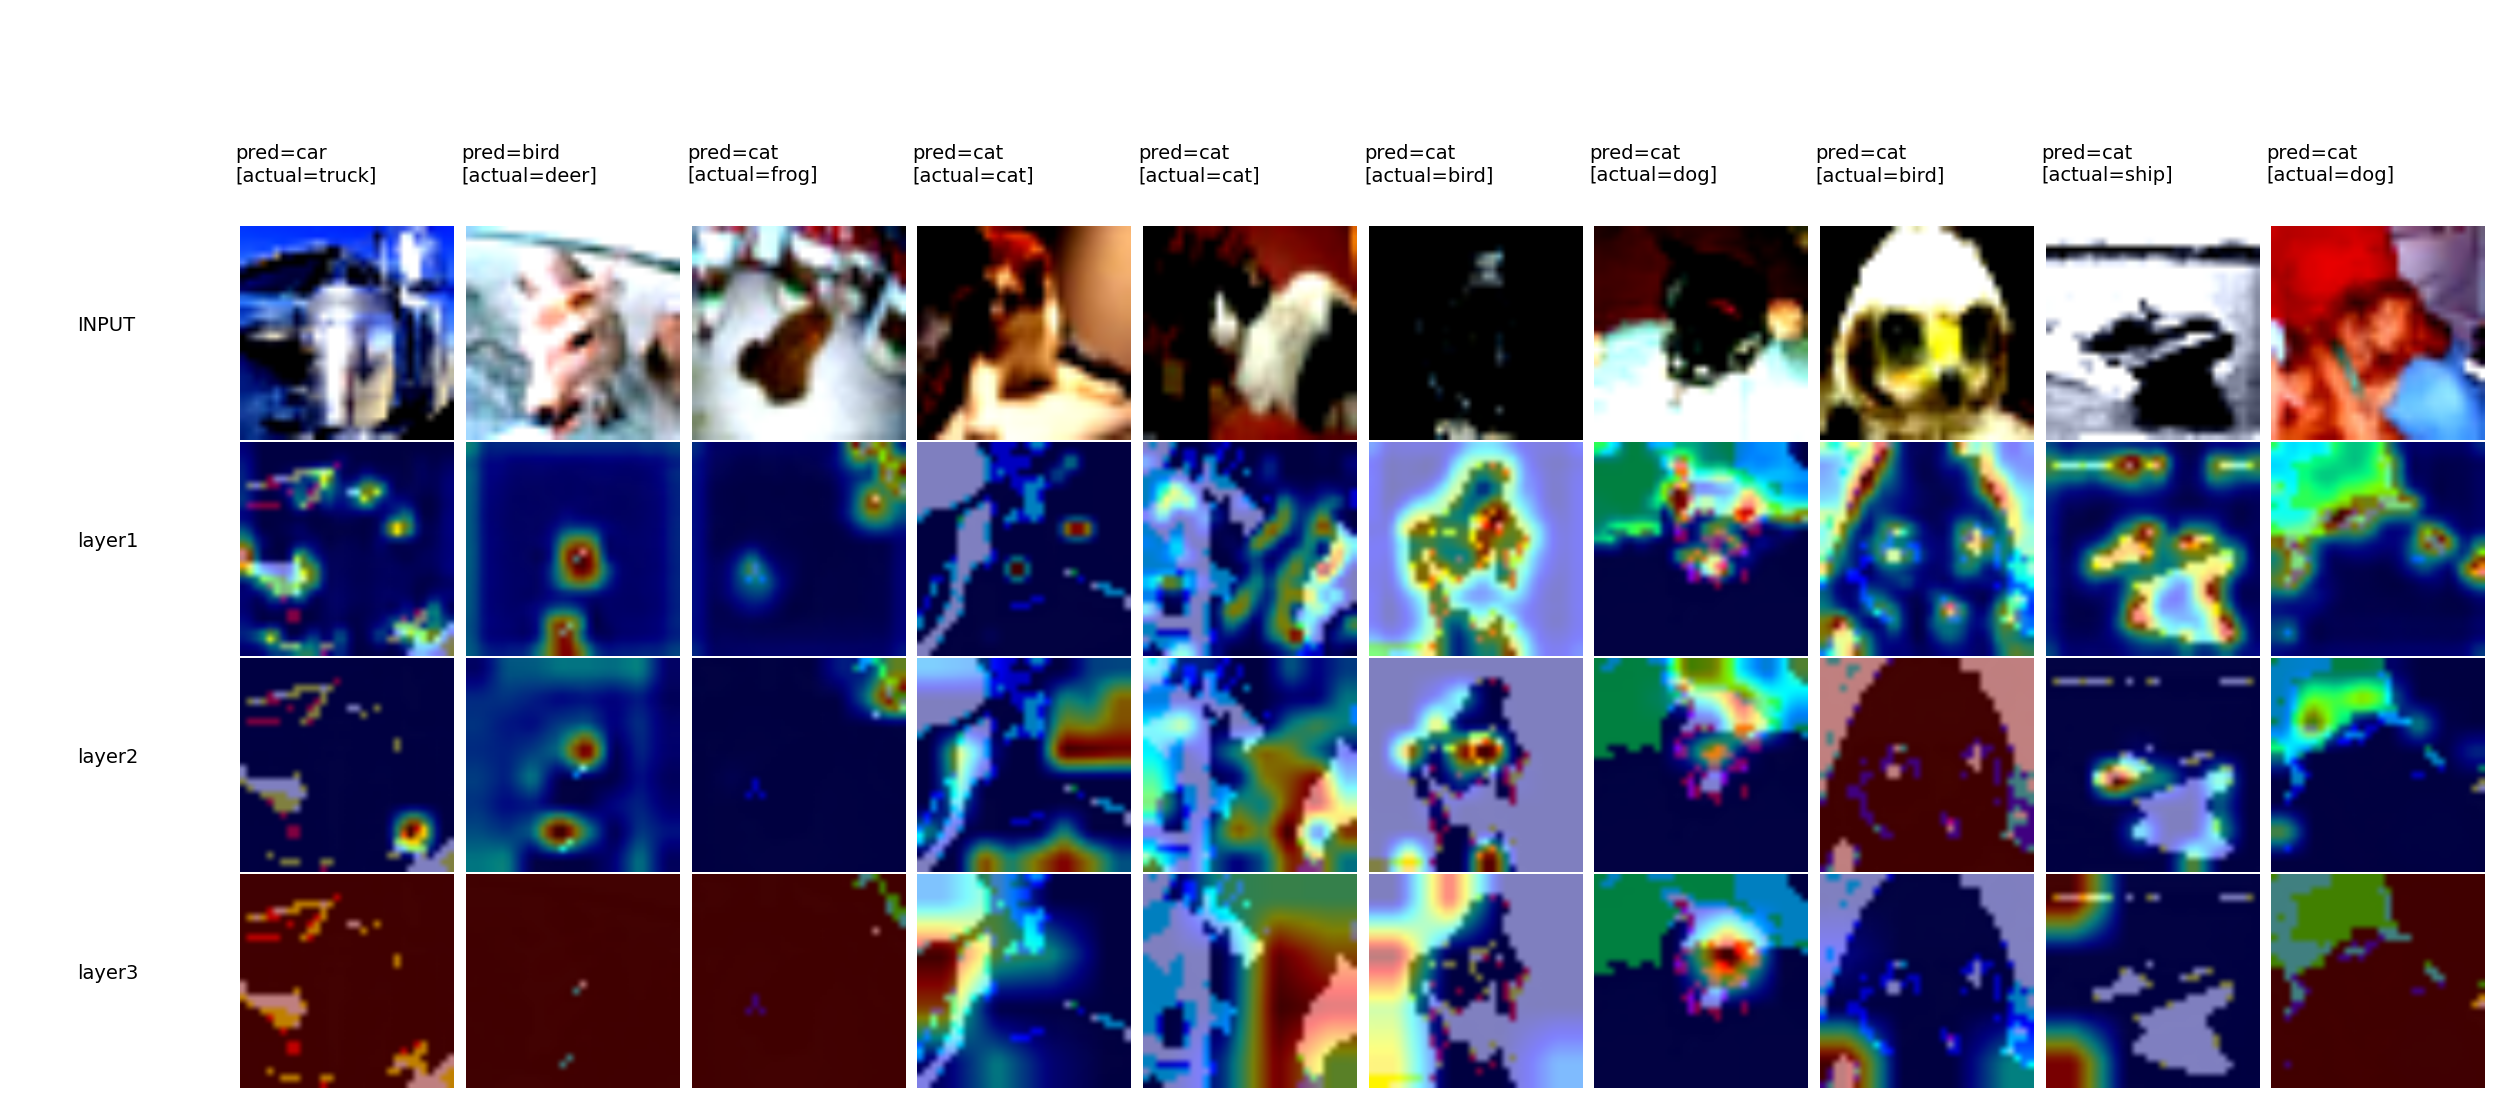

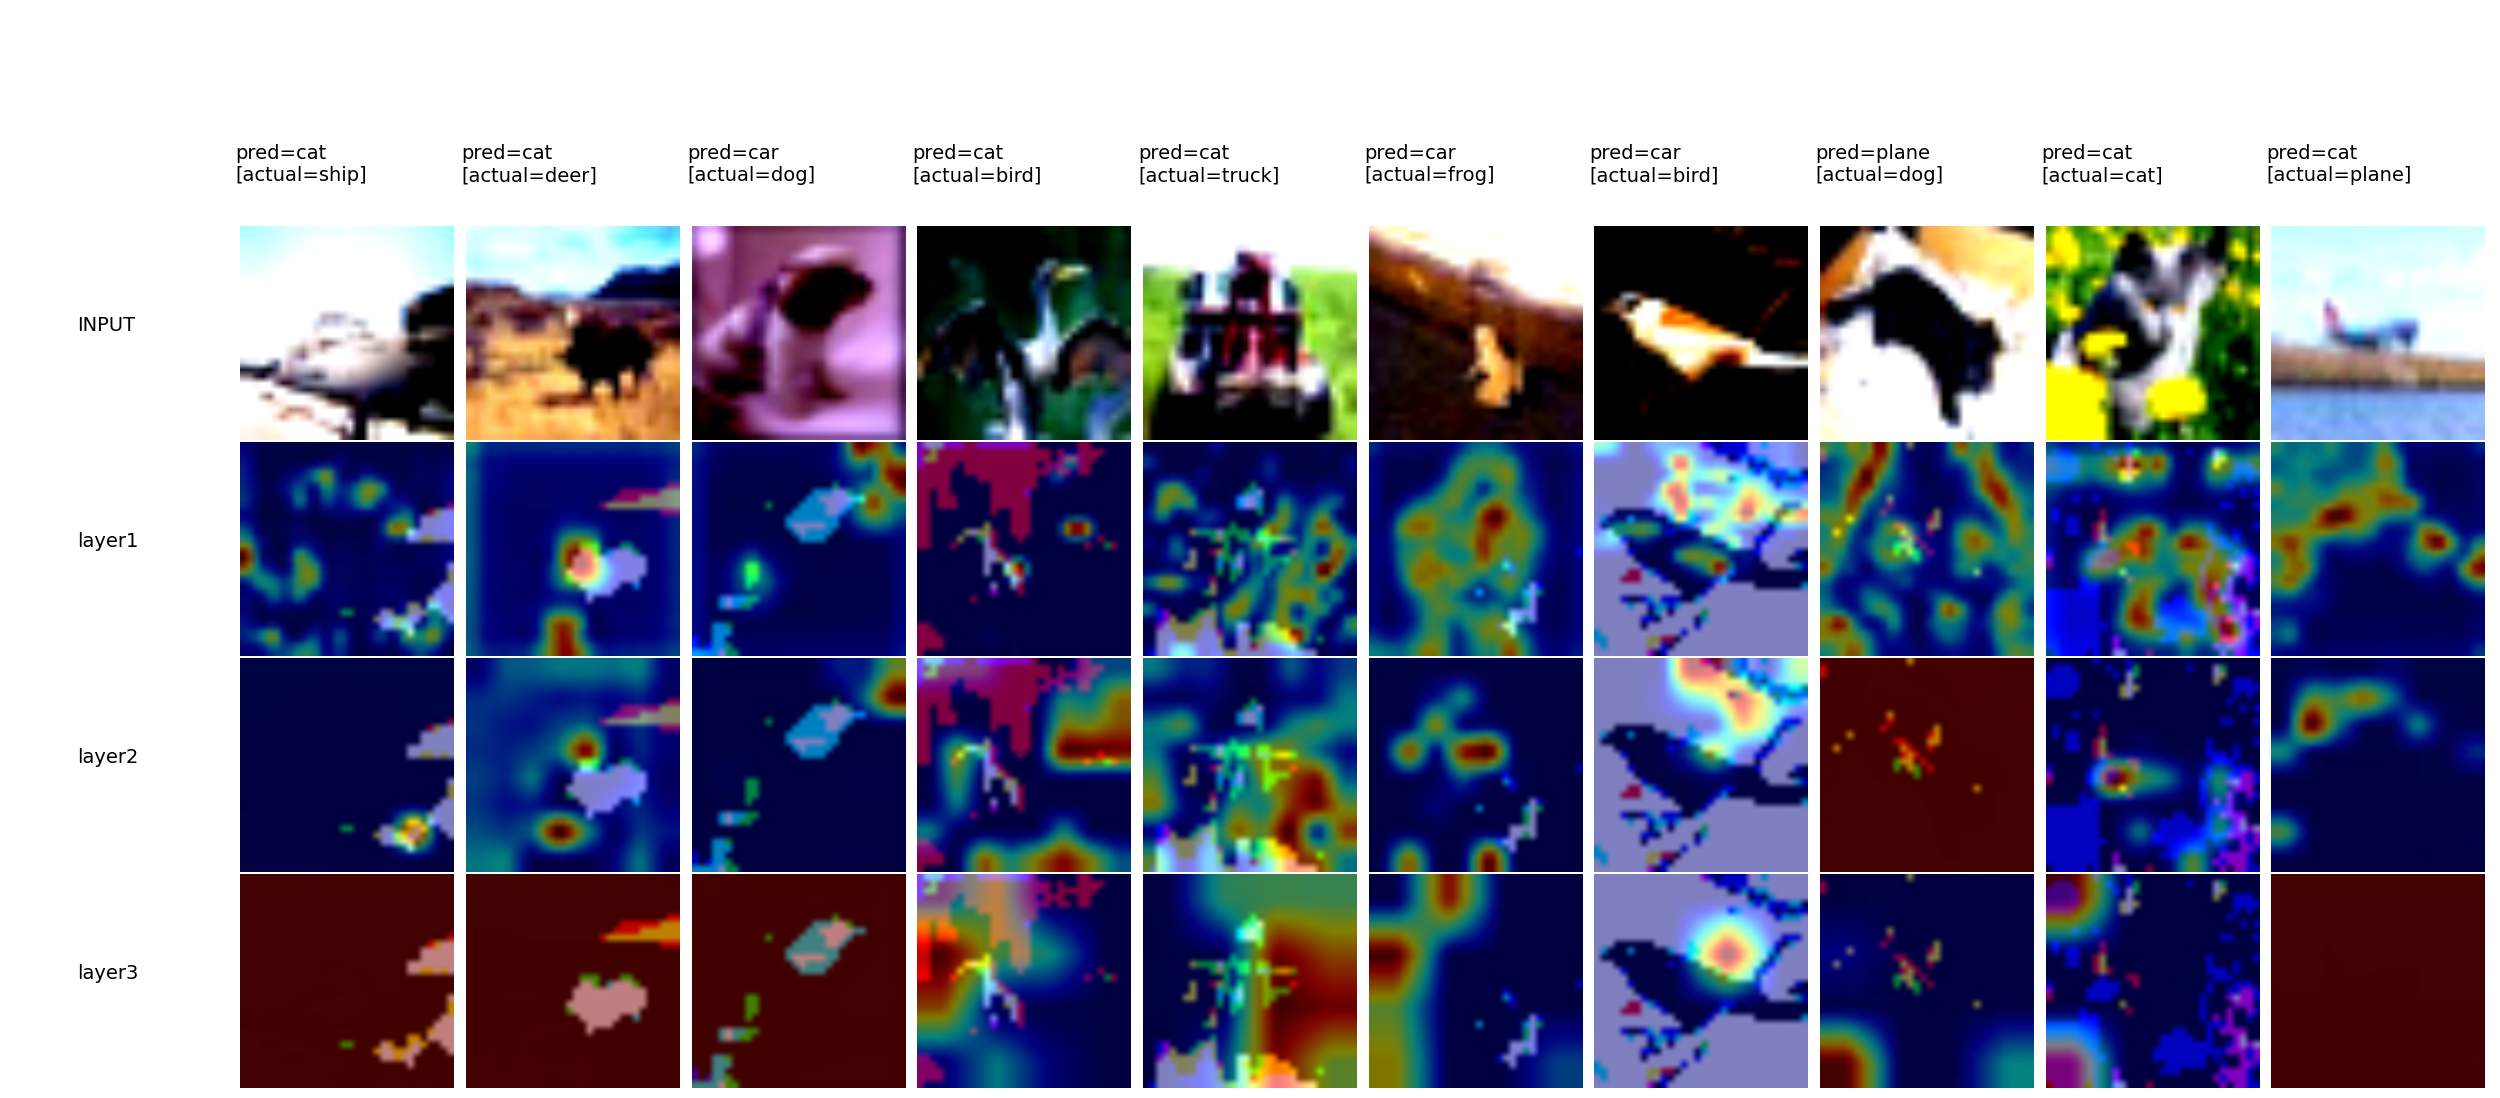

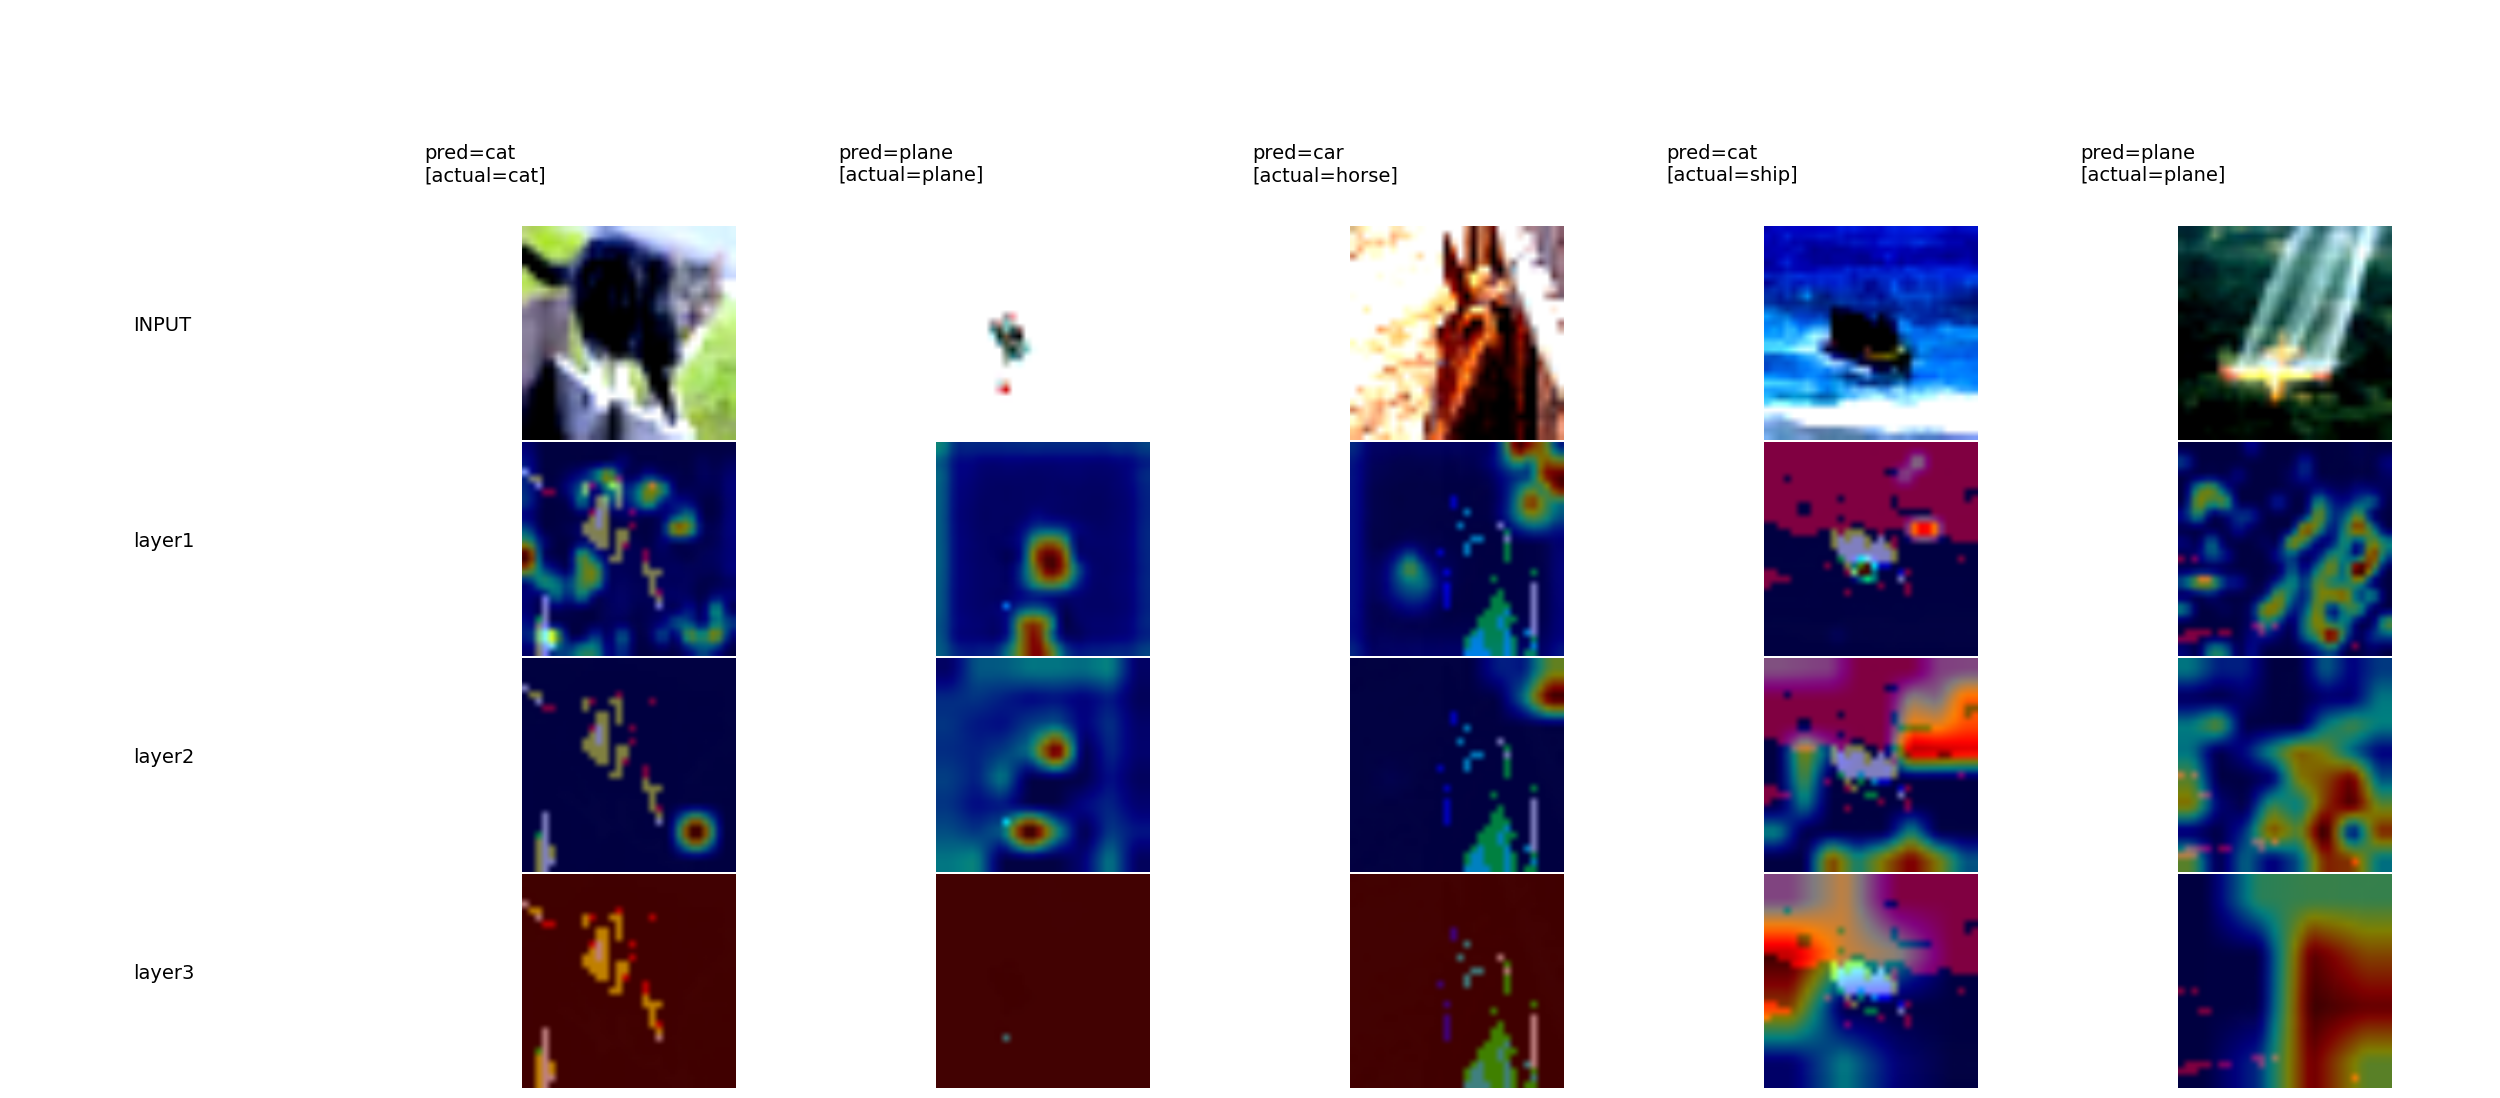

In [ ]:
target_layers = ["layer1", "layer2", "layer3"]
gradcam_output, probs, predicted_classes = GRADCAM(incorrect_images, correct_label_list[0:25], model, target_layers)
print(len(predicted_classes))
PLOTGRADCAM(gradcam_output, incorrect_images_list[0:25],incorrect_images ,correct_label_list[0:25], target_layers, classes, (3, 32, 32), predicted_classes)
